In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import PIL 
import glob
from PIL import Image
import os ,sys
import batch
import tensorflow as tf


In [2]:
%matplotlib inline

In [3]:
train_1 = '/ssd/cervical/train/Type_1/'
train_2 = '/ssd/cervical/train/Type_2/'
train_3 = '/ssd/cervical/train/Type_3/'

add_1 = '/ssd/cervical/additional/Type_1/'
add_2 = '/ssd/cervical/additional/Type_2/'
add_3 = '/ssd/cervical/additional/Type_3/'
src_folder_paths = [train_1 , train_2 , train_3  ,add_1 , add_2, add_3]
labels = [1,2,3,1,2,3]
batch_=batch.batch(src_folder_paths ,labels)

#/ssd/cervical/train/Type_1/:250
#/ssd/cervical/train/Type_2/:781
#/ssd/cervical/train/Type_3/:450
#/ssd/cervical/additional/Type_1/:1191
#/ssd/cervical/additional/Type_2/:3567
#/ssd/cervical/additional/Type_3/:1976
the number of total files :  8215
the number of label files : : 8215


In [ ]:
batch_.make_tfrecord_rawdata('/ssd/cervical/cervical_raw.tfrecords')

-Progress : 37/8215

In [5]:
os.path.exists('/ssd/cervical/cervical_raw.tfrecords')

True

In [4]:
tfrecord_path ='/ssd/cervical_training_data.tfrecords'
batch_xs=batch_.get_shuffled_batch(tfrecord_path,  2 , (224,224))
init_op=tf.group(tf.global_variables_initializer() ,  tf.local_variables_initializer())
sess= tf.Session()
sess.run(init_op)
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess= sess, coord =coord)

img_list=[]
for i in xrange(11):
    img=sess.run(batch_xs)
    print img.shape
coord.request_stop()
coord.join(threads)

AttributeError: 'tuple' object has no attribute 'shape'

(4128, 3096, 3)


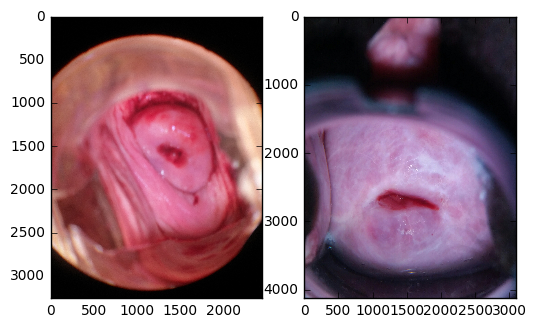

In [8]:
plt.subplot(1,2,1)
plt.imshow(type1_imgs[0])
plt.subplot(1,2,2)
plt.imshow(type1_imgs[1])

print np.shape(type1_imgs[1])

In [8]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

In [9]:
%matplotlib inline
def read_and_decode(filename_queue):
    reader = tf.TFRecordReader()
    _ , serialized_example = reader.read(filename_queue)
    features = tf.parse_single_example(serialized_example,
      # Defaults are not specified since both keys are required.
      features={
        'height': tf.FixedLenFeature([], tf.int64),
        'width': tf.FixedLenFeature([], tf.int64),
        'image_raw': tf.FixedLenFeature([], tf.string)
        })
    image = tf.decode_raw(features['image_raw'], tf.uint8)
    height= tf.cast(features['height'] , tf.int32)
    width = tf.cast(features['width'] , tf.int32)
    image_shape = tf.pack([height , width , 3 ]) 
    image_size_const = tf.constant((IMAGE_HEIGHT , IMAGE_WIDTH , 3) , dtype = tf.int32)
    image=tf.reshape(image ,  image_shape)
    image = tf.image.resize_image_with_crop_or_pad(image=image,
                                           target_height=IMAGE_HEIGHT,
                                           target_width=IMAGE_WIDTH)
    images = tf.train.shuffle_batch([image] , batch_size =2 , capacity =30 ,num_threads=3 , min_after_dequeue=10)
    return images 


In [10]:
tfrecords_filename = '/ssd/type_1.tfrecords '

print tfrecords_filename
filename_queue = tf.train.string_input_producer([tfrecords_filename] , num_epochs=10)
reader = tf.TFRecordReader()
_ , serialized_example = reader.read(filename_queue)
images = read_and_decode(filename_queue)

/ssd/type_1.tfrecords 


In [11]:
init_op =tf.group(tf.global_variables_initializer() , 
                 tf.local_variables_initializer())
sess=tf.Session()  
sess.run(init_op)
coord=tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess = sess , coord = coord)

img_list=[]
for i in xrange(11):
    img=sess.run(images)
    img_list.append(img)
    print (imgs.shape)
    print ('current batch')
    
coord.request_stop()
coord.join(threads)

INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.NotFoundError'>, /ssd/type_1.tfrecords
	 [[Node: ReaderRead = ReaderRead[_class=["loc:@TFRecordReader", "loc:@input_producer"], _device="/job:localhost/replica:0/task:0/cpu:0"](TFRecordReader, input_producer)]]
	 [[Node: Assert_3/Assert/_74 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1, tensor_name="edge_123_Assert_3/Assert", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op u'ReaderRead', defined at:
  File "/usr/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/l

OutOfRangeError: RandomShuffleQueue '_6_shuffle_batch_1/random_shuffle_queue' is closed and has insufficient elements (requested 2, current size 0)
	 [[Node: shuffle_batch_1 = QueueDequeueMany[_class=["loc:@shuffle_batch_1/random_shuffle_queue"], component_types=[DT_UINT8], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/cpu:0"](shuffle_batch_1/random_shuffle_queue, shuffle_batch_1/n)]]

Caused by op u'shuffle_batch_1', defined at:
  File "/usr/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-01cc2ac03d4a>", line 7, in <module>
    images = read_and_decode(filename_queue)
  File "<ipython-input-9-75b3eac56b3d>", line 21, in read_and_decode
    images = tf.train.shuffle_batch([image] , batch_size =2 , capacity =30 ,num_threads=3 , min_after_dequeue=10)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/input.py", line 917, in shuffle_batch
    dequeued = queue.dequeue_many(batch_size, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/data_flow_ops.py", line 458, in dequeue_many
    self._queue_ref, n=n, component_types=self._dtypes, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gen_data_flow_ops.py", line 1099, in _queue_dequeue_many
    timeout_ms=timeout_ms, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

OutOfRangeError (see above for traceback): RandomShuffleQueue '_6_shuffle_batch_1/random_shuffle_queue' is closed and has insufficient elements (requested 2, current size 0)
	 [[Node: shuffle_batch_1 = QueueDequeueMany[_class=["loc:@shuffle_batch_1/random_shuffle_queue"], component_types=[DT_UINT8], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/cpu:0"](shuffle_batch_1/random_shuffle_queue, shuffle_batch_1/n)]]
